In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load IndividualDetails data as df

df = pd.read_csv("/Users/arsh/MFDS-Project/Term-project-2020/Dataset_Question3/IndividualDetails.csv")

In [3]:
# drop id column

df = df.drop(['id'], axis=1)

# offset index by 1

df.index += 1

In [4]:
# taking data only till 10/04/2020

required_data = df[df.index <= 7599]

In [5]:
# get the number of cases by state 

cases_by_state = required_data.groupby(['detected_state']).size()

In [6]:
# convert cases_by_state object to a data frame

cases_by_state = cases_by_state.to_frame()

In [7]:
# rename index column in cases_by_state

cases_by_state.rename({0 : 'no_of_cases'}, axis = 1, inplace=True)

In [8]:
# get the 5 largest states

top_five_states = cases_by_state.nlargest(5, ['no_of_cases'])

## Submit

In [9]:
top_five_states

,no_of_cases
detected_state,
Maharashtra,1574
Tamil Nadu,911
Delhi,903
Rajasthan,561
Telangana,487


In [26]:
top_five_states.to_excel(r'/Users/arsh/MFDS-Project/Q6_data_to_be_submitted1.xlsx', index = False)

In [10]:
# make a list of the largest 5 states by cases

top_states = []
for rows in top_five_states:
    list = [top_five_states.index]
    top_states.append(list)

In [11]:
type(top_states)

list

In [12]:
top_states

[[Index(['Maharashtra', 'Tamil Nadu', 'Delhi', 'Rajasthan', 'Telangana'], dtype='object', name='detected_state')]]

In [13]:
# from the original data frame, create a dataframe with only the top 5 states

df_with_only_top_states = df[df['detected_state'].isin(['Maharashtra', 'Tamil Nadu', 'Delhi', 'Rajasthan', 'Telangana'])]

In [14]:
# make a temporary data frame with given words to indicate primary cases

temp = df_with_only_top_states[df_with_only_top_states['notes'].str.contains('Travelled|Flown|Foreign|Travel|History|Evacuees', case=False, na=False, regex=True)]

In [15]:
# remove all rows with 'no' from temp

temp = temp[~temp['notes'].str.contains('no', case=False, na=False, regex=True)]

In [16]:
# make a copy of temp called primary

primary = temp

In [18]:
# make a temporary data frame with given words to indicate secondary cases

temp1 = df_with_only_top_states[df_with_only_top_states['notes'].str.contains('Family|Accompanied|Relative|neighbour|contacts|contact|friend|friends|wife|daughter|sister|father|mother|co-passenger|cab driver|spouse|doctor|brother|cook|hospital|sister|driver|roommate', case=False, na=False, regex=True)]

In [19]:
# remove given words from secondary temporary data frame

temp1 = temp1[~temp1['notes'].str.contains('travel|travelled', case=False, na=False, regex=True)]

In [20]:
# make a copy of temp1 and store it in secondary

secondary = temp1

In [21]:
# make a data frame consisting of union of primary and secondary dfs

p_and_s = pd.merge(primary, secondary, how='outer')

In [22]:
# make a temporary data frame with given words to indicate tertiary cases

tertiary_temp = df_with_only_top_states[~df_with_only_top_states.index.isin(p_and_s.index)]

In [23]:
# remove given words from tertiary temporary data frame

tertiary = tertiary_temp[~tertiary_temp['notes'].str.contains('travelled|contact', case=False, na=False, regex=True)]

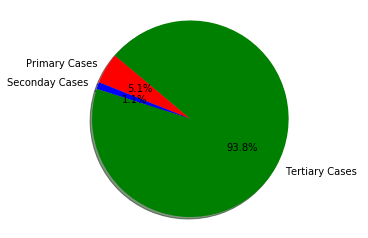

In [24]:
# make a piechart indicating percentage of primary, secondary and tertiary cases as of 10/04/2020

labels = 'Primary Cases', 'Seconday Cases', 'Tertiary Cases'
sizes = [len(primary.index), len(secondary.index), len(tertiary.index)]
colors = ['red', 'blue', 'green']


# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.show()

In [27]:
# create df with no of p, s and t cases

no_of_cases = pd.DataFrame({'Primary' : [len(primary.index)], 'Secondary' : [len(secondary.index)], 'Tertiary' : [len(tertiary.index)]})

# Submit

In [28]:
no_of_cases

,Primary,Secondary,Tertiary
0,805,180,14882


In [30]:
# export df to excel

no_of_cases.to_excel(r'/Users/arsh/MFDS-Project/Q6_data_to_be_submitted2.xlsx', index = False)